### Ordinary Differential Equations  

First- and Second-order separable or linear equations.

__A mathematics and Python learning exercise - do not rely on this notebook__.

There has been little 'generalised' testing, i.e. there may be many cases that break down.

DGMacA - current version 03 February 2023.

#### First-order initial condition problem

Example case: $\ \dfrac{dy}{dx} + y = x^2-3x+1\ $ with initial condition $\ y(0)=1\ $.

Inputs are between asterisked lines:
1. all terms involving $\ y(x),\ y'(x)\ $ are in `expr` (the expression):
2. other terms are included in `rhs`.

Expression:


Eq(y(x) + Derivative(y(x), x), x**2 - 3*x + 1)

General solution


Eq(y(x), C1*exp(-x) + x**2 - 5*x + 6)

Initial value solution (satisfying initial conditions)


Eq(y(x), x**2 - 5*x + 6 - 5*exp(-x))

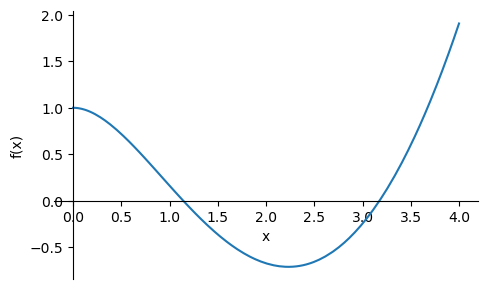

In [1]:
from sympy import symbols, Function, dsolve, classify_ode, Eq, plot
x = symbols('x', positive = True)
# include any other symbols needed
y = Function('y')
#************************************************************
expr = y(x).diff(x) + y(x)
rhs  = x**2 - 3*x + 1
#ics  = {}            # include if no I.C. to be applied
ics = {y(0):1}        # specify initial condition
#************************************************************
print('Expression:')
display(Eq(expr, rhs))
#print('ODE class: ', classify_ode(expr)[0], '\n')
print('General solution')
display(dsolve(Eq(expr, rhs))) # homogeneous solution
if len(ics)>0:
    print('Initial value solution (satisfying initial conditions)')
    sol = dsolve(Eq(expr, rhs), ics=ics); display(sol)
# 'rough and ready' plot
    plot(sol.rhs, (x,0,4), size=(5,3))  # adjust x limits to suit

#### Second-order initial condition problem

Example case: $\ \dfrac{d^2y}{dx^2} + 7 \dfrac{dy}{dx} + 12y = 7\cos{x}\ $ with initial conditions $\ y(0)=1,\ \dfrac{dy}{dx}(0) = 0\ $.

Inputs are between asterisked lines:
1. all terms involving $\ y(x),\ y'(x), \ y''(x)\ $ are in `expr` (the expression):
2. other terms are included in `rhs`.

Expression:


Eq(12*y(x) + 7*Derivative(y(x), x) + Derivative(y(x), (x, 2)), 10*cos(x))


Complementary function:


Eq(y_c(x), C1*exp(-3*x) + C2*exp(-4*x))

General Solution:


Eq(y(x), C1*exp(-4*x) + C2*exp(-3*x) + 7*sin(x)/17 + 11*cos(x)/17)

Particular Solution (satisfying initial conditions):


Eq(y(x), 7*sin(x)/17 + 11*cos(x)/17 + exp(-3*x) - 11*exp(-4*x)/17)

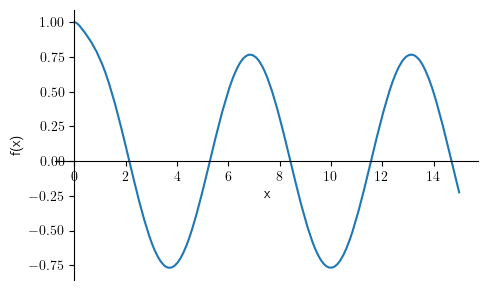

In [2]:
%reset -f
from sympy import symbols, Function, dsolve, classify_ode, lambdify, Eq, plot 
from sympy import simplify, cos, pi, solve, expand
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True})
x = symbols('x', positive=True)
yc = Function('y_c')
y = Function('y')  
#*************************************************************
expr = y(x).diff(x, 2) + 7*y(x).diff(x) + 12*y(x) 
rhs  = 10*cos(x)
#ics  = {}            # include if no I.C. to be applied
ics  = {y(0): 1, y(x).diff(x).subs(x, 0): 0} # y(0)=1, y'(0)=0
#*************************************************************
print('Expression:')
display(Eq(expr, rhs))
#print('ODE class: ', classify_ode(expr)[0])
com_fun = expand(dsolve(Eq(expr, 0))) # complementary function
sol = com_fun.rhs
print('\nComplementary function:')
display(Eq(yc(x), com_fun.rhs))
if rhs != 0:         # applies if equation is not homogeneous
    gen_sol  = dsolve(Eq(expr, rhs))
    print('General Solution:')
    display(gen_sol)
if len(ics) > 0:     # applies if ics specified
    par_sol = dsolve(Eq(expr, rhs), ics=ics); sol = par_sol.rhs
    print('Particular Solution (satisfying initial conditions):')
    display(par_sol)
# 'rough and ready' plot
    plot(sol, (x,0,15), size=(5,3)) # adjust x limits to suit